Import library

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

Read data from train file and test file

In [184]:
df_train = pd.read_csv("./Train_samsung.csv")
df_test = pd.read_csv("./Test_samsung_noclass.csv")

In [185]:
df_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Class
0,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
1,Male,Yes,0,Graduate,No,2958,2900.0,131.0,360.0,1.0,Semiurban,Y
2,Male,Yes,2,Graduate,No,6250,1695.0,210.0,360.0,1.0,Semiurban,Y
3,Male,Yes,0,Graduate,No,2083,3150.0,128.0,360.0,1.0,Semiurban,Y
4,Male,No,0,Graduate,No,4166,0.0,98.0,360.0,0.0,Semiurban,N


In [186]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      479 non-null    object 
 1   X2      490 non-null    object 
 2   X3      480 non-null    object 
 3   X4      491 non-null    object 
 4   X5      467 non-null    object 
 5   X6      491 non-null    int64  
 6   X7      491 non-null    float64
 7   X8      475 non-null    float64
 8   X9      479 non-null    float64
 9   X10     451 non-null    float64
 10  X11     491 non-null    object 
 11  Class   491 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 46.2+ KB


In [187]:
df_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,Male,Yes,0,Graduate,No,9083,0.0,228.0,360.0,1.0,Semiurban
1,Male,Yes,0,Graduate,No,4310,0.0,130.0,360.0,NaN,Semiurban
2,Male,Yes,2,Graduate,No,4167,1447.0,158.0,360.0,1.0,Rural
3,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
4,Male,No,0,Graduate,No,2718,0.0,70.0,360.0,1.0,Semiurban


In [188]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      122 non-null    object 
 1   X2      121 non-null    object 
 2   X3      119 non-null    object 
 3   X4      123 non-null    object 
 4   X5      115 non-null    object 
 5   X6      123 non-null    int64  
 6   X7      123 non-null    float64
 7   X8      117 non-null    float64
 8   X9      121 non-null    float64
 9   X10     113 non-null    float64
 10  X11     123 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 10.7+ KB


Preprocessing data

* Handle missing data train

In [189]:
df_train_1 = df_train.copy()

In [190]:
df_train_1.describe()

,X6,X7,X8,X9,X10
count,491.000000,491.000000,475.000000,479.000000,451.000000
mean,5502.645621,1676.488635,148.722105,340.283925,0.844789
std,5932.951396,3177.641499,87.719000,67.708849,0.362507
min,150.000000,0.000000,17.000000,12.000000,0.000000
25%,2918.500000,0.000000,100.000000,360.000000,1.000000
50%,3900.000000,1126.000000,129.000000,360.000000,1.000000
75%,5938.000000,2333.000000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [191]:
object = ['X1', 'X2', 'X3', 'X5']
number = ['X8', 'X9', 'X10']
for i in number:
    df_train_1[i].fillna(df_train_1[i].median(), inplace=True)
for i in object:
    df_train_1[i].fillna(df_train_1[i].value_counts().index[0], inplace=True)

In [192]:
df_train_1.isna().sum()[df_train_1.isna().sum() > 0]

Series([], dtype: int64)

* Handle missing data test

In [193]:
df_test_1 = df_test.copy()

In [194]:
df_test_1.describe(include= "all")

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
count,122,121,119,123,115,123.000000,123.000000,117.000000,121.000000,113.000000,123
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Urban
freq,103,87,63,98,100,NaN,NaN,NaN,NaN,NaN,43
mean,NaN,NaN,NaN,NaN,NaN,5007.520325,1400.723577,137.034188,348.793388,0.831858,NaN
std,NaN,NaN,NaN,NaN,NaN,6778.297890,1552.013987,75.948705,53.368205,0.375658,NaN
min,NaN,NaN,NaN,NaN,NaN,674.000000,0.000000,9.000000,84.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,2738.000000,0.000000,95.000000,360.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,3601.000000,1260.000000,120.000000,360.000000,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,5000.000000,2174.000000,167.000000,360.000000,1.000000,NaN


In [195]:
object = ['X1', 'X2', 'X3', 'X5']
number = ['X8', 'X9', 'X10']
for i in number:
    df_test_1[i].fillna(df_test_1[i].median(), inplace=True)
for i in object:
    df_test_1[i].fillna(df_test_1[i].value_counts().index[0], inplace=True)

In [196]:
df_test_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      123 non-null    object 
 1   X2      123 non-null    object 
 2   X3      123 non-null    object 
 3   X4      123 non-null    object 
 4   X5      123 non-null    object 
 5   X6      123 non-null    int64  
 6   X7      123 non-null    float64
 7   X8      123 non-null    float64
 8   X9      123 non-null    float64
 9   X10     123 non-null    float64
 10  X11     123 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 10.7+ KB


### Kiểm tra outliers IQR

In [197]:
df_train_2 = df_train_1.copy()

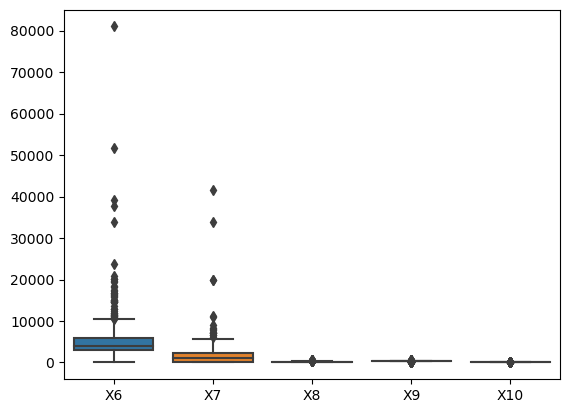

In [198]:
fig, axs = plt.subplots()
sns.boxplot(data=df_train_2)
plt.show()

In [199]:
q25, q75 = np.quantile(df_train_2['X6'], 0.25), np.quantile(df_train_2['X6'], 0.75)
iqr = q75 - q25
lower, upper = q25 - 1.5*iqr, q75 + 1.5*iqr
df_iqr = df_train_2[(df_train_2['X6'] < upper) & (df_train_2['X6'] > lower)]

In [200]:
q25, q75 = np.quantile(df_iqr['X7'], 0.25), np.quantile(df_iqr['X7'], 0.75)
iqr = q75 - q25
lower, upper = q25 - 1.5*iqr, q75 + 1.5*iqr
df_iqr = df_iqr[(df_iqr['X7'] < upper) & (df_iqr['X7'] > lower)]

In [201]:
df_iqr.describe()

,X6,X7,X8,X9,X10
count,433.000000,433.000000,433.000000,433.000000,433.000000
mean,4215.960739,1345.671871,131.198614,340.822171,0.856813
std,1967.250357,1460.688082,52.375313,68.019797,0.350669
min,150.000000,0.000000,17.000000,12.000000,0.000000
25%,2873.000000,0.000000,100.000000,360.000000,1.000000
50%,3676.000000,1280.000000,127.000000,360.000000,1.000000
75%,5185.000000,2253.000000,154.000000,360.000000,1.000000
max,10416.000000,5701.000000,376.000000,480.000000,1.000000


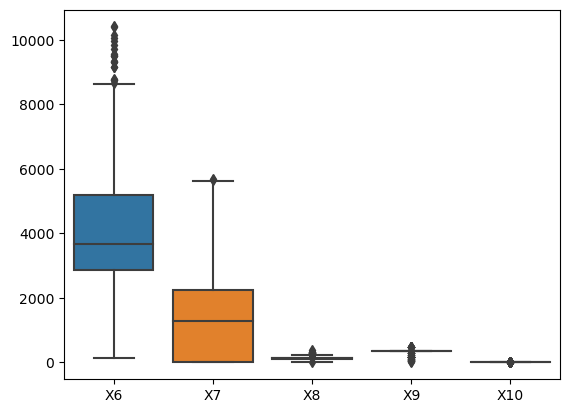

In [202]:
fig, axs = plt.subplots()
sns.boxplot(data=df_iqr)
plt.show()

In [203]:
df_iqr

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Class
0,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,1.0,Semiurban,N
1,Male,Yes,0,Graduate,No,2958,2900.0,131.0,360.0,1.0,Semiurban,Y
2,Male,Yes,2,Graduate,No,6250,1695.0,210.0,360.0,1.0,Semiurban,Y
3,Male,Yes,0,Graduate,No,2083,3150.0,128.0,360.0,1.0,Semiurban,Y
4,Male,No,0,Graduate,No,4166,0.0,98.0,360.0,0.0,Semiurban,N
...,...,...,...,...,...,...,...,...,...,...,...,...
484,Female,No,0,Graduate,No,4166,0.0,44.0,360.0,1.0,Semiurban,Y
485,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N
486,Male,Yes,2,Not Graduate,Yes,1875,1875.0,97.0,360.0,1.0,Semiurban,Y
488,Female,No,0,Graduate,No,3237,0.0,30.0,360.0,1.0,Urban,Y


Encode Category Feature

Encode data train

In [204]:
df_train_3 = df_iqr.copy()

In [205]:
df_train_3

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Class
0,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,1.0,Semiurban,N
1,Male,Yes,0,Graduate,No,2958,2900.0,131.0,360.0,1.0,Semiurban,Y
2,Male,Yes,2,Graduate,No,6250,1695.0,210.0,360.0,1.0,Semiurban,Y
3,Male,Yes,0,Graduate,No,2083,3150.0,128.0,360.0,1.0,Semiurban,Y
4,Male,No,0,Graduate,No,4166,0.0,98.0,360.0,0.0,Semiurban,N
...,...,...,...,...,...,...,...,...,...,...,...,...
484,Female,No,0,Graduate,No,4166,0.0,44.0,360.0,1.0,Semiurban,Y
485,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N
486,Male,Yes,2,Not Graduate,Yes,1875,1875.0,97.0,360.0,1.0,Semiurban,Y
488,Female,No,0,Graduate,No,3237,0.0,30.0,360.0,1.0,Urban,Y


In [206]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df_object = ['X1','X2','X3','X4','X5','X11']
for i in df_object :
    encode.fit(df_train_3[i])
    df_train_3[i] = encode.transform(df_train_3[i])


In [207]:
df_train_3

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Class
0,1,1,0,0,0,6000,2250.0,265.0,360.0,1.0,1,N
1,1,1,0,0,0,2958,2900.0,131.0,360.0,1.0,1,Y
2,1,1,2,0,0,6250,1695.0,210.0,360.0,1.0,1,Y
3,1,1,0,0,0,2083,3150.0,128.0,360.0,1.0,1,Y
4,1,0,0,0,0,4166,0.0,98.0,360.0,0.0,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...
484,0,0,0,0,0,4166,0.0,44.0,360.0,1.0,1,Y
485,1,1,0,1,0,7660,0.0,104.0,360.0,0.0,2,N
486,1,1,2,1,1,1875,1875.0,97.0,360.0,1.0,1,Y
488,0,0,0,0,0,3237,0.0,30.0,360.0,1.0,2,Y


In [208]:
x = df_train_3.iloc[:, :-1]
x

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,1,1,0,0,0,6000,2250.0,265.0,360.0,1.0,1
1,1,1,0,0,0,2958,2900.0,131.0,360.0,1.0,1
2,1,1,2,0,0,6250,1695.0,210.0,360.0,1.0,1
3,1,1,0,0,0,2083,3150.0,128.0,360.0,1.0,1
4,1,0,0,0,0,4166,0.0,98.0,360.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
484,0,0,0,0,0,4166,0.0,44.0,360.0,1.0,1
485,1,1,0,1,0,7660,0.0,104.0,360.0,0.0,2
486,1,1,2,1,1,1875,1875.0,97.0,360.0,1.0,1
488,0,0,0,0,0,3237,0.0,30.0,360.0,1.0,2


In [209]:
y = df_train_3.iloc[:, -1]
y

0      N
1      Y
2      Y
3      Y
4      N
      ..
484    Y
485    N
486    Y
488    Y
489    Y
Name: Class, Length: 433, dtype: object

* Encode Dependent variable (Y)

In [210]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
y = label.fit_transform(y)
y

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,

Encode data_test

* Encode Independent variable (X)

In [211]:
df_test_2 = df_test_1.copy()

In [212]:
df_test_2

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,Male,Yes,0,Graduate,No,9083,0.0,228.0,360.0,1.0,Semiurban
1,Male,Yes,0,Graduate,No,4310,0.0,130.0,360.0,1.0,Semiurban
2,Male,Yes,2,Graduate,No,4167,1447.0,158.0,360.0,1.0,Rural
3,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
4,Male,No,0,Graduate,No,2718,0.0,70.0,360.0,1.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...
118,Male,Yes,0,Graduate,No,3716,0.0,42.0,180.0,1.0,Rural
119,Female,No,0,Graduate,No,2507,0.0,56.0,360.0,1.0,Rural
120,Male,Yes,1,Graduate,No,2882,1843.0,123.0,480.0,1.0,Semiurban
121,Male,Yes,2,Graduate,No,2500,1840.0,109.0,360.0,1.0,Urban


In [213]:
df_test_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      123 non-null    object 
 1   X2      123 non-null    object 
 2   X3      123 non-null    object 
 3   X4      123 non-null    object 
 4   X5      123 non-null    object 
 5   X6      123 non-null    int64  
 6   X7      123 non-null    float64
 7   X8      123 non-null    float64
 8   X9      123 non-null    float64
 9   X10     123 non-null    float64
 10  X11     123 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 10.7+ KB


In [214]:
from sklearn.preprocessing import LabelEncoder
encode_test = LabelEncoder()
df_object_test= ['X1','X2','X3','X4','X5','X11']
for i in df_object_test :
    encode_test.fit(df_test_2[i])
    df_test_2[i] = encode_test.transform(df_test_2[i])

In [215]:
df_test_2

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,1,1,0,0,0,9083,0.0,228.0,360.0,1.0,1
1,1,1,0,0,0,4310,0.0,130.0,360.0,1.0,1
2,1,1,2,0,0,4167,1447.0,158.0,360.0,1.0,0
3,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
4,1,0,0,0,0,2718,0.0,70.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
118,1,1,0,0,0,3716,0.0,42.0,180.0,1.0,0
119,0,0,0,0,0,2507,0.0,56.0,360.0,1.0,0
120,1,1,1,0,0,2882,1843.0,123.0,480.0,1.0,1
121,1,1,2,0,0,2500,1840.0,109.0,360.0,1.0,2


Scaling data

* Scaling data_train

In [216]:
x = x.values
x

array([[  1.,   1.,   0., ..., 360.,   1.,   1.],
       [  1.,   1.,   0., ..., 360.,   1.,   1.],
       [  1.,   1.,   2., ..., 360.,   1.,   1.],
       ...,
       [  1.,   1.,   2., ..., 360.,   1.,   1.],
       [  0.,   0.,   0., ..., 360.,   1.,   2.],
       [  0.,   1.,   0., ..., 240.,   1.,   1.]])

In [217]:
from sklearn.preprocessing import StandardScaler,RobustScaler, MinMaxScaler
sc = StandardScaler()
sc.fit(x[:, 6:11])
x[:, 6:11] = sc.transform(x[:, 6:11])

In [218]:
x

array([[ 1.        ,  1.        ,  0.        , ...,  0.28227095,
         0.40879812, -0.02667935],
       [ 1.        ,  1.        ,  0.        , ...,  0.28227095,
         0.40879812, -0.02667935],
       [ 1.        ,  1.        ,  2.        , ...,  0.28227095,
         0.40879812, -0.02667935],
       ...,
       [ 1.        ,  1.        ,  2.        , ...,  0.28227095,
         0.40879812, -0.02667935],
       [ 0.        ,  0.        ,  0.        , ...,  0.28227095,
         0.40879812,  1.25689368],
       [ 0.        ,  1.        ,  0.        , ..., -1.48396202,
         0.40879812, -0.02667935]])

* Scaling data test

In [219]:
df_test_2 = df_test_2.values

In [220]:
df_test_2[:, 6:11] = sc.transform(df_test_2[:, 6:11])

### Feature Selection PCA & Imbalance data

In [221]:
x.shape, y.shape

((433, 11), (433,))

In [222]:
pca = PCA(n_components=8)
pca.fit(x)
x_pca = pca.transform(x)

In [223]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
smote = RandomOverSampler(random_state=42)

x_im, y_im = smote.fit_resample(x_pca, y)

Splitting Data

In [224]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_im, y_im, test_size = 0.2, random_state = 42, shuffle=True, stratify=y_im)
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((488, 8), (488,), (122, 8), (122,))

Training machine learning model

In [225]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

In [226]:
RF = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
RF.fit(x_train, y_train)
y_pred = RF.predict(x_val)


accuracy = accuracy_score(y_val, y_pred)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_val, y_pred, average='weighted')
print('Precision: %f' % precision)

recall = recall_score(y_val, y_pred, average='weighted')
print('Recall: %f' % recall)

f1 = f1_score(y_val, y_pred, average='weighted')
print('F1 score: %f' % f1)
print(classification_report(y_val, y_pred))

Accuracy: 0.942623
Precision: 0.943696
Recall: 0.942623
F1 score: 0.942588
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        61
           1       0.97      0.92      0.94        61

    accuracy                           0.94       122
   macro avg       0.94      0.94      0.94       122
weighted avg       0.94      0.94      0.94       122



In [227]:
gau = GaussianNB()
gau.fit(x_train, y_train)
y_pred = gau.predict(x_val)


accuracy = accuracy_score(y_val, y_pred)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_val, y_pred, average='weighted')
print('Precision: %f' % precision)

recall = recall_score(y_val, y_pred, average='weighted')
print('Recall: %f' % recall)

f1 = f1_score(y_val, y_pred, average='weighted')
print('F1 score: %f' % f1)
print(classification_report(y_val, y_pred))

Accuracy: 0.696721
Precision: 0.793269
Recall: 0.696721
F1 score: 0.669522
              precision    recall  f1-score   support

           0       0.96      0.41      0.57        61
           1       0.62      0.98      0.76        61

    accuracy                           0.70       122
   macro avg       0.79      0.70      0.67       122
weighted avg       0.79      0.70      0.67       122



In [228]:
SVM = SVC(random_state=42, class_weight='balanced')
SVM.fit(x_train, y_train)
y_pred = SVM.predict(x_val)


accuracy = accuracy_score(y_val, y_pred)
print('Accuracy: %f' % accuracy)


precision = precision_score(y_val, y_pred, average='weighted')
print('Precision: %f' % precision)

recall = recall_score(y_val, y_pred, average='weighted')
print('Recall: %f' % recall)

f1 = f1_score(y_val, y_pred, average='weighted')
print('F1 score: %f' % f1)
print(classification_report(y_val, y_pred))

Accuracy: 0.516393
Precision: 0.519703
Recall: 0.516393
F1 score: 0.495196
              precision    recall  f1-score   support

           0       0.51      0.72      0.60        61
           1       0.53      0.31      0.39        61

    accuracy                           0.52       122
   macro avg       0.52      0.52      0.50       122
weighted avg       0.52      0.52      0.50       122



In [229]:
LR1 = LogisticRegression(random_state=42, class_weight='balanced')
LR1.fit(x_train, y_train)
y_pred = LR1.predict(x_val)

accuracy = accuracy_score(y_val, y_pred)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_val, y_pred, average='weighted')
print('Precision: %f' % precision)


recall = recall_score(y_val, y_pred, average='weighted')
print('Recall: %f' % recall)

f1 = f1_score(y_val, y_pred, average='weighted')
print('F1 score: %f' % f1)
print(classification_report(y_val, y_pred))

Accuracy: 0.680328
Precision: 0.724265
Recall: 0.680328
F1 score: 0.663864
              precision    recall  f1-score   support

           0       0.82      0.46      0.59        61
           1       0.62      0.90      0.74        61

    accuracy                           0.68       122
   macro avg       0.72      0.68      0.66       122
weighted avg       0.72      0.68      0.66       122



Attack label

In [230]:
df_test_2.shape

(123, 11)

In [231]:
colunms = df_test.columns

In [232]:
colunms

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11'], dtype='object')

In [233]:
df_test_3 = pd.DataFrame(df_test_2, columns= colunms)
df_test_3

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,1.0,1.0,0.0,0.0,0.0,9083.0,-0.922325,1.850363,0.282271,0.408798,-0.026679
1,1.0,1.0,0.0,0.0,0.0,4310.0,-0.922325,-0.022912,0.282271,0.408798,-0.026679
2,1.0,1.0,2.0,0.0,0.0,4167.0,0.069450,0.512310,0.282271,0.408798,-1.310252
3,0.0,0.0,0.0,0.0,0.0,2900.0,-0.922325,-1.150700,0.282271,0.408798,-1.310252
4,1.0,0.0,0.0,0.0,0.0,2718.0,-0.922325,-1.169815,0.282271,0.408798,-0.026679
...,...,...,...,...,...,...,...,...,...,...,...
118,1.0,1.0,0.0,0.0,0.0,3716.0,-0.922325,-1.705036,-2.367079,0.408798,-1.310252
119,0.0,0.0,0.0,0.0,0.0,2507.0,-0.922325,-1.437425,0.282271,0.408798,-1.310252
120,1.0,1.0,1.0,0.0,0.0,2882.0,0.340869,-0.156717,2.048504,0.408798,-0.026679
121,1.0,1.0,2.0,0.0,0.0,2500.0,0.338813,-0.424328,0.282271,0.408798,1.256894


In [234]:
df_test_4 = pca.transform(df_test_3)
df_test_4.shape

c:\Users\DELL\.conda\envs\iot\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


(123, 8)

In [235]:
target = RF.predict(df_test_4)

target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [236]:
df_test_3['Class'] = target

In [237]:
df_test_3

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Class
0,1.0,1.0,0.0,0.0,0.0,9083.0,-0.922325,1.850363,0.282271,0.408798,-0.026679,1
1,1.0,1.0,0.0,0.0,0.0,4310.0,-0.922325,-0.022912,0.282271,0.408798,-0.026679,1
2,1.0,1.0,2.0,0.0,0.0,4167.0,0.069450,0.512310,0.282271,0.408798,-1.310252,1
3,0.0,0.0,0.0,0.0,0.0,2900.0,-0.922325,-1.150700,0.282271,0.408798,-1.310252,1
4,1.0,0.0,0.0,0.0,0.0,2718.0,-0.922325,-1.169815,0.282271,0.408798,-0.026679,1
...,...,...,...,...,...,...,...,...,...,...,...,...
118,1.0,1.0,0.0,0.0,0.0,3716.0,-0.922325,-1.705036,-2.367079,0.408798,-1.310252,1
119,0.0,0.0,0.0,0.0,0.0,2507.0,-0.922325,-1.437425,0.282271,0.408798,-1.310252,0
120,1.0,1.0,1.0,0.0,0.0,2882.0,0.340869,-0.156717,2.048504,0.408798,-0.026679,1
121,1.0,1.0,2.0,0.0,0.0,2500.0,0.338813,-0.424328,0.282271,0.408798,1.256894,1


In [238]:
df_test_5 = df_test.copy()

In [239]:
df_test_5['Class'] = target

In [240]:
df_test_5['Class'].replace(0, "N", inplace= True)
df_test_5['Class'].replace(1, "Y", inplace= True)

In [241]:
df_test_5

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Class
0,Male,Yes,0,Graduate,No,9083,0.0,228.0,360.0,1.0,Semiurban,Y
1,Male,Yes,0,Graduate,No,4310,0.0,130.0,360.0,NaN,Semiurban,Y
2,Male,Yes,2,Graduate,No,4167,1447.0,158.0,360.0,1.0,Rural,Y
3,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
4,Male,No,0,Graduate,No,2718,0.0,70.0,360.0,1.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
118,Male,Yes,0,Graduate,NaN,3716,0.0,42.0,180.0,1.0,Rural,Y
119,Female,No,0,Graduate,No,2507,0.0,56.0,360.0,1.0,Rural,N
120,Male,Yes,1,Graduate,No,2882,1843.0,123.0,480.0,1.0,Semiurban,Y
121,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y


In [242]:
df_test_3.to_csv("./ketqua.csv")
df_test_5.to_csv("./ketqua1.csv")